In [187]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [189]:
iris = load_iris(as_frame=True)

In [191]:
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [193]:
df = df[df["target"] != 0][["sepal width (cm)", "petal length (cm)", "target"]]
df.sample(15)

# df.drop(columns=["sepal length (cm)", "petal width (cm)"], inplace=True)
# df

,sepal width (cm),petal length (cm),target
60,2.0,3.5,1
58,2.9,4.6,1
141,3.1,5.1,2
77,3.0,5.0,1
133,2.8,5.1,2
63,2.9,4.7,1
146,2.5,5.0,2
149,3.0,5.1,2
119,2.2,5.0,2
116,3.0,5.5,2


In [195]:
df.shape

(100, 3)

In [197]:
# X = iris.data
# y = iris.target

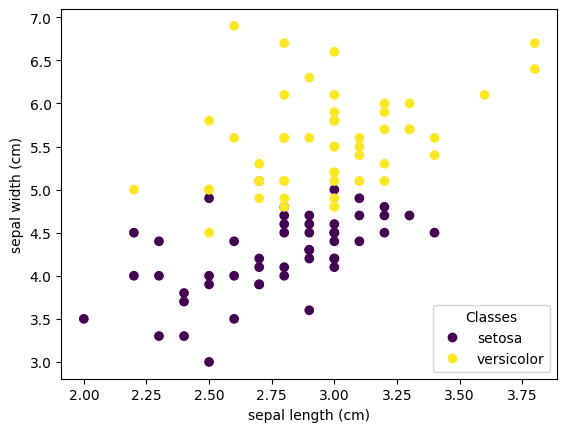

In [199]:
_, ax = plt.subplots()
scatter = ax.scatter(df.iloc[:,0], df.iloc[:,1], c=df.iloc[:,-1])
ax.set(xlabel = iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [97]:
# plt.scatter(df["sepal width (cm)"], df["petal length (cm)"], c=df["target"], cmap="winter")

In [201]:
df.head(50)

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
55,2.8,4.5,1
56,3.3,4.7,1
57,2.4,3.3,1
58,2.9,4.6,1
59,2.7,3.9,1


In [203]:
df.iloc[50:100]

,sepal width (cm),petal length (cm),target
100,3.3,6.0,2
101,2.7,5.1,2
102,3.0,5.9,2
103,2.9,5.6,2
104,3.0,5.8,2
105,3.0,6.6,2
106,2.5,4.5,2
107,2.9,6.3,2
108,2.5,5.8,2
109,3.6,6.1,2


In [205]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [207]:
df_train

,sepal width (cm),petal length (cm),target
126,2.8,4.8,2
98,2.5,3.0,1
103,2.9,5.6,2
111,2.7,5.3,2
91,3.0,4.6,1
72,2.5,4.9,1
145,3.0,5.2,2
71,2.8,4.0,1
108,2.5,5.8,2
149,3.0,5.1,2


In [209]:
df_val

,sepal width (cm),petal length (cm),target
65,3.1,4.4,1
75,3.0,4.4,1
83,2.7,5.1,1
94,2.7,4.2,1
73,2.8,4.7,1


In [211]:
df_test

,sepal width (cm),petal length (cm),target
136,3.4,5.6,2
99,2.8,4.1,1
57,2.4,3.3,1
88,3.0,4.1,1
123,2.7,4.9,2


In [213]:
# Creating an array
X_test = df.iloc[:,0:2].values
y_test = df.iloc[:,-1].values

In [215]:
X_test

array([[2.5, 4.9],
       [2.3, 4. ],
       [3. , 4.5],
       [3.2, 4.8],
       [2.8, 5.6],
       [3.3, 5.7],
       [3.2, 5.7],
       [2.8, 4.8],
       [3.1, 4.7],
       [3.2, 5.9],
       [2.5, 5. ],
       [2.6, 6.9],
       [2.8, 6.1],
       [2.5, 5.8],
       [2.5, 5. ],
       [2.9, 3.6],
       [2.8, 4. ],
       [3. , 5.5],
       [2.9, 5.6],
       [2.7, 5.1],
       [3.2, 4.5],
       [3.1, 5.4],
       [2.9, 6.3],
       [2.8, 4.6],
       [2.8, 5.1],
       [2.6, 5.6],
       [3. , 4.2],
       [3.2, 4.7],
       [3.2, 5.3],
       [2.7, 4.1],
       [3. , 5.5],
       [3. , 4.8],
       [2.7, 3.9],
       [3. , 5.9],
       [2.7, 5.3],
       [3.8, 6.7],
       [3.6, 6.1],
       [3. , 4.5],
       [2.9, 4.7],
       [3. , 5. ],
       [2.8, 6.7],
       [2.9, 4.2],
       [3. , 5.8],
       [2.6, 4. ],
       [2.8, 4.8],
       [3. , 5.1],
       [3. , 5.2],
       [3.1, 5.6],
       [3. , 5.8],
       [2.3, 4.4],
       [2.2, 4. ],
       [2.4, 3.8],
       [2.8,

In [217]:
y_test

array([1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2])

# Case 1 - Bagging - Boot Straping

In [220]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [232]:
def evaluate(clf, X, y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

In [234]:
# Data for Tree 1
df_bag = df_train.sample(8, replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,sepal width (cm),petal length (cm),target
111,2.7,5.3,2
71,2.8,4.0,1
108,2.5,5.8,2
145,3.0,5.2,2
145,3.0,5.2,2
126,2.8,4.8,2
108,2.5,5.8,2
111,2.7,5.3,2


In [236]:
dt_bag1 = DecisionTreeClassifier()

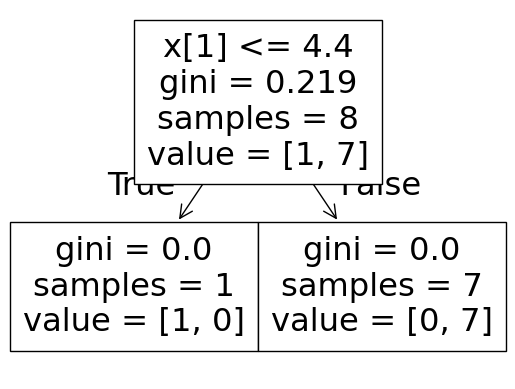

C:\Users\atifs\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\atifs\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy Score: 0.79


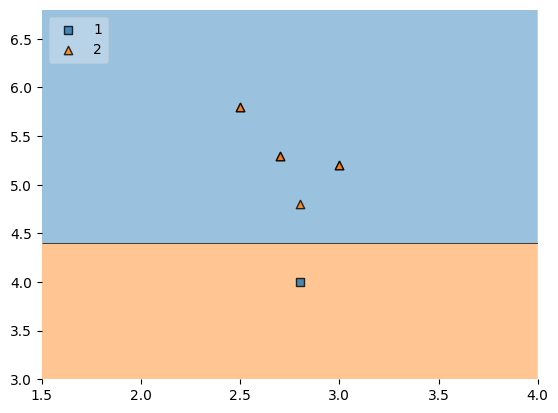

In [238]:
evaluate(dt_bag1, X, y)

In [242]:
# Data for Tree 2
df_bag = df_train.sample(8, replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,sepal width (cm),petal length (cm),target
103,2.9,5.6,2
149,3.0,5.1,2
126,2.8,4.8,2
111,2.7,5.3,2
108,2.5,5.8,2
126,2.8,4.8,2
72,2.5,4.9,1
71,2.8,4.0,1


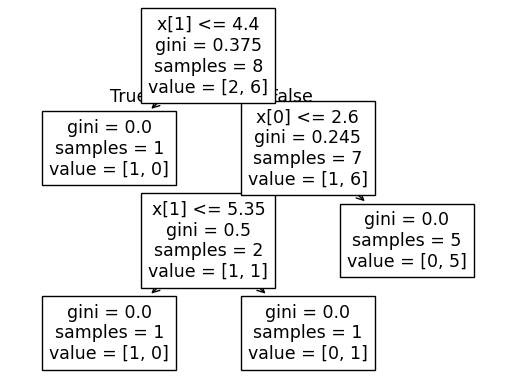

C:\Users\atifs\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\atifs\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy Score: 0.77


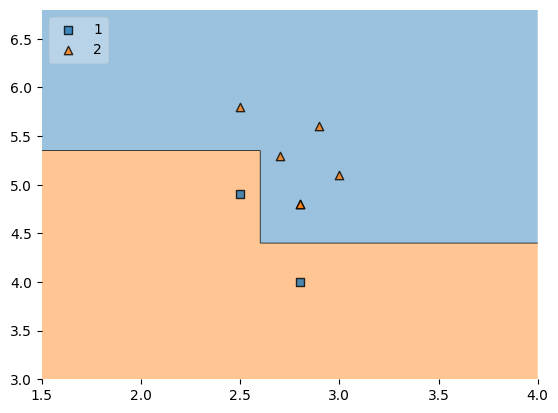

In [244]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2, X, y)

In [246]:
# Data for Tree 3
df_bag = df_train.sample(8, replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,sepal width (cm),petal length (cm),target
126,2.8,4.8,2
72,2.5,4.9,1
72,2.5,4.9,1
71,2.8,4.0,1
98,2.5,3.0,1
103,2.9,5.6,2
126,2.8,4.8,2
91,3.0,4.6,1


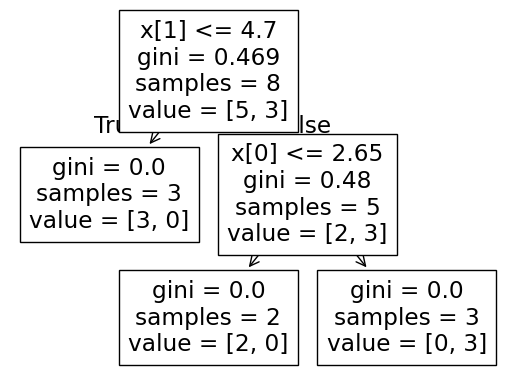

C:\Users\atifs\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\atifs\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy Score: 0.88


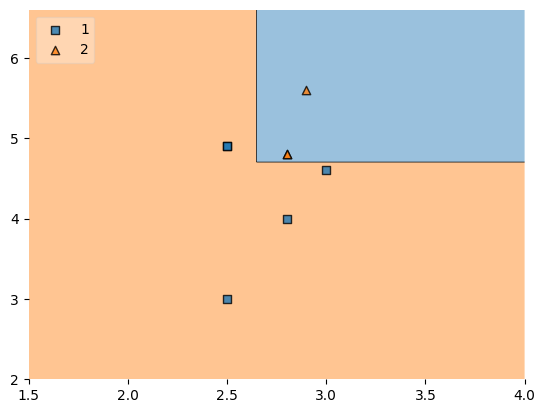

In [248]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3, X, y)

# Predit - Aggregation

In [254]:
df_test

,sepal width (cm),petal length (cm),target
136,3.4,5.6,2
99,2.8,4.1,1
57,2.4,3.3,1
88,3.0,4.1,1
123,2.7,4.9,2


In [258]:
print("Predictor 1", dt_bag1.predict(np.array([2.9,4.6]).reshape(1,2)))
print("Predictor 2", dt_bag2.predict(np.array([2.9,4.6]).reshape(1,2)))
print("Predictor 3", dt_bag3.predict(np.array([2.9,4.6]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [1]


C:\Users\atifs\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\atifs\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\atifs\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [262]:
print("Predictor 1", dt_bag1.predict(np.array([2.7,4.9]).reshape(1,2)))
print("Predictor 2", dt_bag2.predict(np.array([2.7,4.9]).reshape(1,2)))
print("Predictor 3", dt_bag3.predict(np.array([2.7,4.9]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\atifs\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\atifs\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\atifs\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Type of Bagging

# Column Sampling

## Pasting
### Same row sampling but without replacement

In [268]:
df_train.sample(8)

,sepal width (cm),petal length (cm),target
126,2.8,4.8,2
103,2.9,5.6,2
71,2.8,4.0,1
145,3.0,5.2,2
108,2.5,5.8,2
91,3.0,4.6,1
111,2.7,5.3,2
72,2.5,4.9,1


## Random Subspaces
### Do not row sampling do Column sampling with or without replacement

In [271]:
df1 = iris.frame

In [273]:
df1 = df1.sample(10)

In [275]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
22,4.6,3.6,1.0,0.2,0
43,5.0,3.5,1.6,0.6,0
93,5.0,2.3,3.3,1.0,1
7,5.0,3.4,1.5,0.2,0
117,7.7,3.8,6.7,2.2,2
134,6.1,2.6,5.6,1.4,2
121,5.6,2.8,4.9,2.0,2
101,5.8,2.7,5.1,1.9,2
114,5.8,2.8,5.1,2.4,2
26,5.0,3.4,1.6,0.4,0


In [277]:
df1.sample(2, replace=True, axis=1)

,sepal width (cm),petal length (cm)
22,3.6,1.0
43,3.5,1.6
93,2.3,3.3
7,3.4,1.5
117,3.8,6.7
134,2.6,5.6
121,2.8,4.9
101,2.7,5.1
114,2.8,5.1
26,3.4,1.6


## Random Patches
### Do both row and column sampling

In [291]:
df1.sample(8, replace=True).sample(2, replace=True, axis=1)

,petal width (cm),petal width (cm)
7,0.2,0.2
114,2.4,2.4
117,2.2,2.2
114,2.4,2.4
134,1.4,1.4
121,2.0,2.0
93,1.0,1.0
7,0.2,0.2
